In [1]:
import pandas as pd
import numpy as np
import os
import sys
import time
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Geographical plots

In [2]:
# Load the data
NHS_Region_data = pd.read_csv(
    "../data/NHS_region/NHS_England_Regions_July_2022_EN_BFC_2022_8847953782386516656.csv"
)

# Load the shapefile
NHS_Region_gdf = gpd.read_file(
    "../data/NHS_region/NHS_England_Regions_July_2022_EN_BFC_2022_-5487250391308697487/NHSER_JUL_2022_EN_BFC.shp"
)

# load population data
pop_data = pd.read_csv("../data/population.csv")

In [3]:
NHS_Region_data.head()

,OBJECTID,NHSER22CD,NHSER22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,Shape__Area,Shape__Length
0,1,E40000003,London,517515,178392,-0.308660,51.49227,0ed9266f-d879-4018-b6f4-93e9141d17c5,1.573423e+09,4.324026e+05
1,2,E40000005,South East,471724,171073,-0.969570,51.43412,e65f164c-d972-4631-88ac-c4502d165b8f,1.868876e+10,2.741766e+06
2,3,E40000006,South West,285015,102567,-3.633430,50.81119,4c391736-de3a-4949-bfa1-28796fab96d4,2.387926e+10,3.588545e+06
3,4,E40000007,East of England,565970,255923,0.425889,52.17661,6b5f57d5-9882-48ca-bfe0-50bb8e40266c,1.949970e+10,3.977127e+06
4,5,E40000010,North West,356889,444857,-2.657550,53.89809,06dbe856-2d3b-478c-aaa5-205ab8e6ba43,9.260648e+09,1.925621e+06


In [4]:
NHS_Region_gdf

,NHSER22CD,NHSER22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E40000003,London,517515,178392,-0.308660,51.4923,0ed9266f-d879-4018-b6f4-93e9141d17c5,"MULTIPOLYGON (((516122.679 172421.288, 516112...."
1,E40000005,South East,471724,171073,-0.969570,51.4341,e65f164c-d972-4631-88ac-c4502d165b8f,"MULTIPOLYGON (((429043.995 84840.073, 429056.1..."
2,E40000006,South West,285015,102567,-3.633430,50.8112,4c391736-de3a-4949-bfa1-28796fab96d4,"MULTIPOLYGON (((83962.840 5401.150, 83970.680 ..."
3,E40000007,East of England,565970,255923,0.425889,52.1766,6b5f57d5-9882-48ca-bfe0-50bb8e40266c,"MULTIPOLYGON (((570605.060 181382.250, 570608...."
4,E40000010,North West,356889,444857,-2.657550,53.8981,06dbe856-2d3b-478c-aaa5-205ab8e6ba43,"MULTIPOLYGON (((327869.488 373719.637, 327869...."
5,E40000011,Midlands,436686,314502,-1.458210,52.7269,e98a319f-b86d-4974-b23f-ad197e10d667,"MULTIPOLYGON (((552751.427 326659.292, 552759...."
6,E40000012,North East and Yorkshire,388426,515856,-2.180390,54.5378,9e9b0244-95b4-4f72-b99f-8aab2cc57915,"MULTIPOLYGON (((495603.099 422511.497, 495629...."


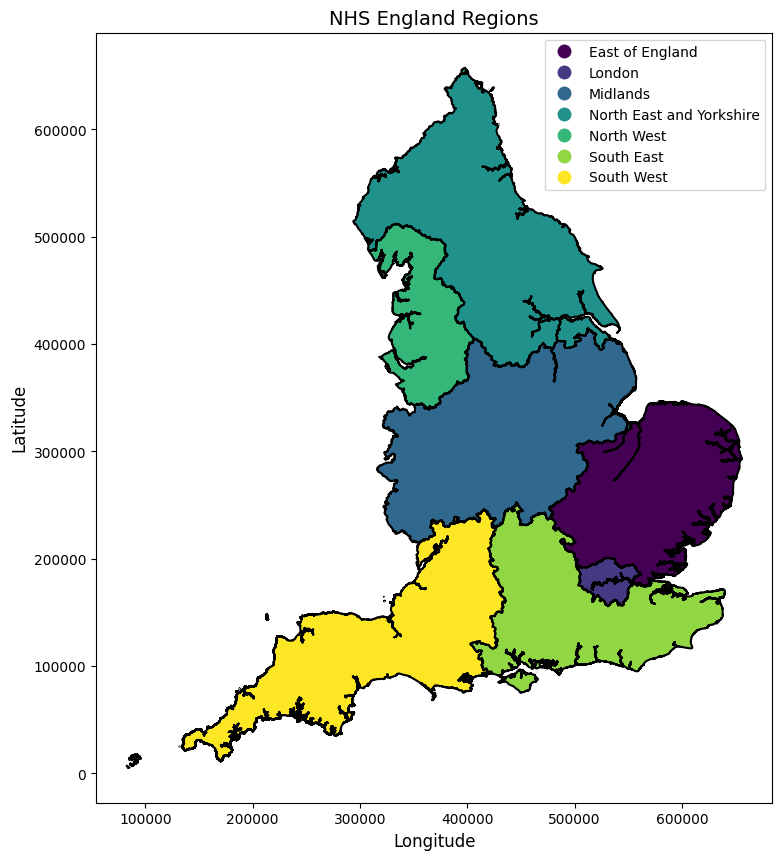

In [5]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the UK
NHS_Region_gdf.boundary.plot(ax=ax, color="black")

# Plot the regions with different colors
NHS_Region_gdf.plot(ax=ax, column="NHSER22NM", legend=True, cmap="viridis")

# Add labels
NHS_Region_gdf["coords"] = NHS_Region_gdf["geometry"].apply(
    lambda x: x.representative_point().coords[:]
)
NHS_Region_gdf["coords"] = [coords[0] for coords in NHS_Region_gdf["coords"]]
# for idx, row in gdf.iterrows():
#     plt.annotate(text=row['NHSER22NM'], xy=row['coords'], horizontalalignment='center')

# Set labels and title
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_title("NHS England Regions", fontsize=14)

plt.show()

In [6]:
nation_data = pd.read_csv(
    "../data/Nation_region/Countries_Dec_2021_GB_BFC_2022_-3032294030278234928.csv"
)

nation_gdf = gpd.read_file(
    "../data/Nation_region/Countries_Dec_2021_GB_BFC_2022_4877037204428751838/CTRY_DEC_2021_GB_BFC.shp"
)

In [7]:
nation_data

,OBJECTID,CTRY21CD,CTRY21NM,CTRY21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,Shape__Area,Shape__Length
0,1,E92000001,England,Lloegr,394883,370883,-2.07811,53.2350,bc2053f2-bee6-4b30-b53b-6332af6045b3,1.304623e+11,1.358948e+07
1,2,S92000003,Scotland,Yr Alban,277744,700060,-3.97094,56.1774,3d6cbede-3847-48ee-825f-58a039b2c387,7.880122e+10,1.890234e+07
2,3,W92000004,Wales,Cymru,263405,242881,-3.99417,52.0674,7ee0bab0-9dd8-445e-9295-d2a0739b2aff,2.078260e+10,3.273760e+06


In [8]:
nation_gdf

,CTRY21CD,CTRY21NM,CTRY21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E92000001,England,Lloegr,394883,370883,-2.07811,53.2350,bc2053f2-bee6-4b30-b53b-6332af6045b3,"MULTIPOLYGON (((83962.840 5401.150, 83970.680 ..."
1,S92000003,Scotland,Yr Alban,277744,700060,-3.97094,56.1774,3d6cbede-3847-48ee-825f-58a039b2c387,"MULTIPOLYGON (((265944.630 543512.720, 265945...."
2,W92000004,Wales,Cymru,263405,242881,-3.99417,52.0674,7ee0bab0-9dd8-445e-9295-d2a0739b2aff,"MULTIPOLYGON (((322081.699 165165.901, 322082...."


Text(0.5, 1.0, 'countries Regions')

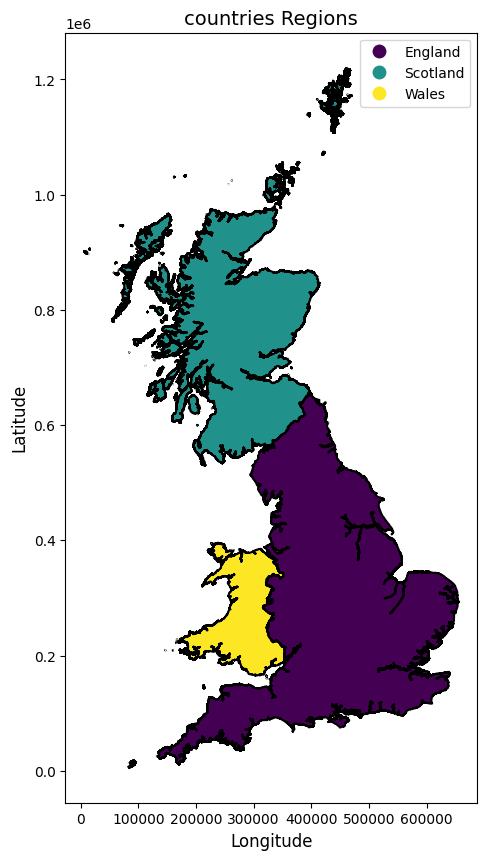

In [9]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the UK
nation_gdf.boundary.plot(ax=ax, color="black")

# Plot the regions with different colors
nation_gdf.plot(ax=ax, column="CTRY21NM", legend=True, cmap="viridis")

# Add labels
nation_gdf["coords"] = nation_gdf["geometry"].apply(
    lambda x: x.representative_point().coords[:]
)
nation_gdf["coords"] = [coords[0] for coords in nation_gdf["coords"]]
# for idx, row in gdf.iterrows():
#     plt.annotate(text=row['NHSER22NM'], xy=row['coords'], horizontalalignment='center')

# Set labels and title
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_title("countries Regions", fontsize=14)

In [10]:
UTLA_data = pd.read_csv(
    "../data/UTLA_region/Counties_and_Unitary_Authorities_December_2022_UK_BFC_-3551263108181469190.csv"
)

UTLA_gdf = gpd.read_file(
    "../data/UTLA_region/Counties_and_Unitary_Authorities_December_2022_UK_BFC_-4274932253738652752/CTYUA_DEC_2022_UK_BFC.shp"
)

In [11]:
UTLA_gdf

,CTYUA22CD,CTYUA22NM,CTYUA22NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,NaN,447160,531474,-1.27018,54.6761,c6d63f75-e86d-42dd-933f-81fcba396819,"MULTIPOLYGON (((450154.599 525938.201, 450140...."
1,E06000002,Middlesbrough,NaN,451141,516887,-1.21099,54.5447,84fc4817-9273-447e-8e15-54ec8c6b1f62,"MULTIPOLYGON (((446854.700 517192.700, 446854...."
2,E06000003,Redcar and Cleveland,NaN,464361,519597,-1.00608,54.5675,e666ccc0-5857-4a72-a593-b6fa4bacf82b,"MULTIPOLYGON (((451747.397 520561.100, 451792...."
3,E06000004,Stockton-on-Tees,NaN,444940,518183,-1.30664,54.5569,a755ad64-72b4-4458-8b16-0989fccea42c,"MULTIPOLYGON (((447177.704 517811.797, 447176...."
4,E06000005,Darlington,NaN,428029,515648,-1.56835,54.5353,a7f705de-2208-4bcb-957c-9982fbfbcce2,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...
212,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,a58a4aba-8351-4cf8-a664-77791307eefa,"POLYGON ((323898.201 211287.499, 324115.698 21..."
213,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,b3e96943-117d-4a5c-a3db-29d046235115,"MULTIPOLYGON (((345897.698 180999.599, 345884...."
214,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,3274b61c-3fc4-41d9-bec1-8a2ba54357ec,"MULTIPOLYGON (((334186.001 192669.398, 334201...."
215,W06000023,Powys,Powys,302329,273255,-3.43531,52.3486,f50f60b8-1d65-4dbb-9643-b2b21e920b5e,"MULTIPOLYGON (((270499.000 297829.350, 270658...."


Text(0.5, 1.0, 'Upper tier local authority Regions')

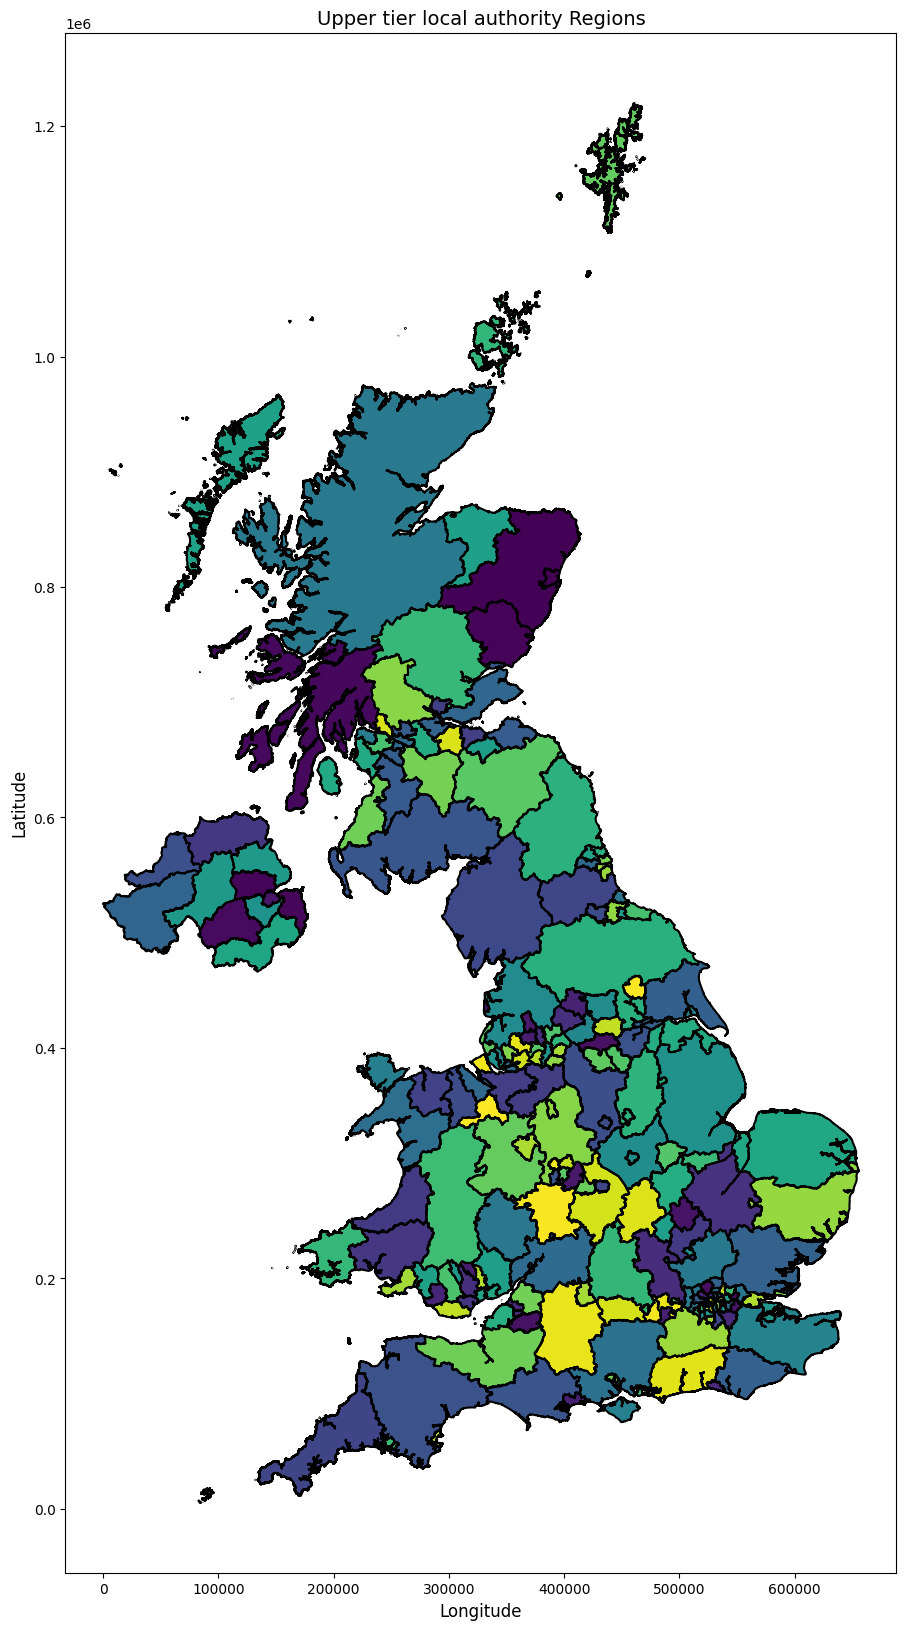

In [12]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Plot the UK
UTLA_gdf.boundary.plot(ax=ax, color="black")

# Plot the regions with different colors
UTLA_gdf.plot(ax=ax, column="CTYUA22NM", cmap="viridis")

# Add labels
UTLA_gdf["coords"] = UTLA_gdf["geometry"].apply(
    lambda x: x.representative_point().coords[:]
)
UTLA_gdf["coords"] = [coords[0] for coords in UTLA_gdf["coords"]]
# for idx, row in gdf.iterrows():
#     plt.annotate(text=row['NHSER22NM'], xy=row['coords'], horizontalalignment='center')

# Set labels and title
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_title("Upper tier local authority Regions", fontsize=14)

In [13]:
pop_data

,Code,Name,Geography,Mid-2021,Mid-2011,Mid-2001
0,K02000001,UNITED KINGDOM,Country,"67,026,292","63,285,145","59,113,016"
1,K03000001,GREAT BRITAIN,Country,"65,121,729","61,470,827","57,424,178"
2,K04000001,ENGLAND AND WALES,Country,"59,641,829","56,170,927","52,359,978"
3,E92000001,ENGLAND,Country,"56,536,419","53,107,169","49,449,746"
4,E12000001,NORTH EAST,Region,"2,646,772","2,596,441","2,540,090"
...,...,...,...,...,...,...
415,N09000006,Fermanagh and Omagh,Local Government District,"116,926","113,501","105,751"
416,N09000007,Lisburn and Castlereagh,Local Government District,"149,272","135,280","124,585"
417,N09000008,Mid and East Antrim,Local Government District,"139,127","135,365","127,452"
418,N09000009,Mid Ulster,Local Government District,"150,598","139,011","119,112"


In [14]:
nation_data = pd.read_csv("../data/Nation_region/nation_data.csv")
nation_graph = pd.read_csv("../data/Nation_region/Countries_Dec_2021_GB_BFC_2022_-3032294030278234928.csv")

In [15]:
pop_data = pop_data.rename(columns={"Code": "areaCode", "Mid-2021": "population"})
nation_graph = nation_graph.rename(
    columns={"CTRY21CD": "areaCode", "LONG": "long", "LAT": "lat"}
)

In [16]:
pop_data

,areaCode,Name,Geography,population,Mid-2011,Mid-2001
0,K02000001,UNITED KINGDOM,Country,"67,026,292","63,285,145","59,113,016"
1,K03000001,GREAT BRITAIN,Country,"65,121,729","61,470,827","57,424,178"
2,K04000001,ENGLAND AND WALES,Country,"59,641,829","56,170,927","52,359,978"
3,E92000001,ENGLAND,Country,"56,536,419","53,107,169","49,449,746"
4,E12000001,NORTH EAST,Region,"2,646,772","2,596,441","2,540,090"
...,...,...,...,...,...,...
415,N09000006,Fermanagh and Omagh,Local Government District,"116,926","113,501","105,751"
416,N09000007,Lisburn and Castlereagh,Local Government District,"149,272","135,280","124,585"
417,N09000008,Mid and East Antrim,Local Government District,"139,127","135,365","127,452"
418,N09000009,Mid Ulster,Local Government District,"150,598","139,011","119,112"


In [17]:
print("Columns in pop_data: ", pop_data.columns)
print("Columns in nation_graph: ", nation_graph.columns)
print("Columns in nation_data: ", nation_data.columns)

Columns in pop_data:  Index(['areaCode', 'Name', 'Geography', 'population', 'Mid-2011', 'Mid-2001'], dtype='object')
Columns in nation_graph:  Index(['OBJECTID', 'areaCode', 'CTRY21NM', 'CTRY21NMW', 'BNG_E', 'BNG_N',
       'long', 'lat', 'GlobalID', 'Shape__Area', 'Shape__Length'],
      dtype='object')
Columns in nation_data:  Index(['date', 'areaName', 'areaCode', 'dailyCases', 'dailyDeaths', 'day'], dtype='object')


In [18]:
merged_df = pd.merge(
    nation_data, pop_data[["areaCode", "population"]], on="areaCode", how="left"
)

In [19]:
merged_df = pd.merge(
    merged_df, nation_graph[["areaCode", "long", "lat"]], on="areaCode", how="left"
)

In [20]:
merged_df

,date,areaName,areaCode,dailyCases,dailyDeaths,day,population,long,lat
0,2023-05-25,England,E92000001,6748,355,1180,"56,536,419",-2.07811,53.2350
1,2023-05-18,England,E92000001,7258,361,1173,"56,536,419",-2.07811,53.2350
2,2023-05-11,England,E92000001,9014,407,1166,"56,536,419",-2.07811,53.2350
3,2023-05-04,England,E92000001,10352,588,1159,"56,536,419",-2.07811,53.2350
4,2023-04-27,England,E92000001,10486,614,1152,"56,536,419",-2.07811,53.2350
...,...,...,...,...,...,...,...,...,...
3143,2020-03-15,Wales,W92000004,34,0,14,"3,105,410",-3.99417,52.0674
3144,2020-03-14,Wales,W92000004,22,0,13,"3,105,410",-3.99417,52.0674
3145,2020-03-13,Wales,W92000004,13,0,12,"3,105,410",-3.99417,52.0674
3146,2020-03-12,Wales,W92000004,10,0,11,"3,105,410",-3.99417,52.0674


In [21]:
def merge_dataframes(
    covid_data_path, covid_graph_path, population_data_path, output_file_name, column
):
    """
    This function merges three dataframes: covid_data, covid_graph, and population_data.
    The merged dataframe is then saved to a CSV file.

    Parameters:
    covid_data_path (str): The file path of the covid data CSV file.
    covid_graph_path (str): The file path of the covid graph CSV file.
    population_data_path (str): The file path of the population data CSV file.
    output_file_name (str): The name of the output CSV file.
    """

    # Load the dataframes from the CSV files
    covid_data = pd.read_csv(covid_data_path)
    covid_graph = pd.read_csv(covid_graph_path)
    population_data = pd.read_csv(population_data_path)

    # Rename the relevant columns in population_data and covid_graph to match the columns in covid_data
    population_data = population_data.rename(
        columns={"Code": "areaCode", "Mid-2021": "population"}
    )
    covid_graph = covid_graph.rename(
        columns={column: "areaCode", "LONG": "long", "LAT": "lat"}
    )

    # Merge the dataframes
    merged_df = pd.merge(
        covid_data,
        population_data[["areaCode", "population"]],
        on="areaCode",
        how="left",
    )
    merged_df = pd.merge(
        merged_df, covid_graph[["areaCode", "long", "lat"]], on="areaCode", how="left"
    )

    # Save the merged dataframe to a CSV file
    merged_df.to_csv(output_file_name, index=False)

In [22]:
merge_dataframes(
    "../data/Nation_region/nation_data.csv",
    "../data/Nation_region/Countries_Dec_2021_GB_BFC_2022_-3032294030278234928.csv",
    "../data/population.csv",
    "../data/Nation_region/merged_Nationdata.csv",
    "CTRY21CD"
)

In [23]:
data = pd.read_csv("../data/Nation_region/merged_Nationdata.csv")
data.head()

,date,areaName,areaCode,dailyCases,dailyDeaths,day,population,long,lat
0,2023-05-25,England,E92000001,6748,355,1180,"56,536,419",-2.07811,53.235
1,2023-05-18,England,E92000001,7258,361,1173,"56,536,419",-2.07811,53.235
2,2023-05-11,England,E92000001,9014,407,1166,"56,536,419",-2.07811,53.235
3,2023-05-04,England,E92000001,10352,588,1159,"56,536,419",-2.07811,53.235
4,2023-04-27,England,E92000001,10486,614,1152,"56,536,419",-2.07811,53.235


In [24]:
merge_dataframes(
    covid_data_path = "../data/UTLA_region/utla_data.csv",
    covid_graph_path = "../data/UTLA_region/Counties_and_Unitary_Authorities_December_2022_UK_BFC_-3551263108181469190.csv",
    population_data_path = "../data/population.csv",
    output_file_name = "../data/UTLA_region/merged_UTLA.csv",
    column = "CTYUA22CD"
)

In [25]:
data = pd.read_csv("../data/UTLA_region/merged_UTLA.csv")
data

,date,areaName,areaCode,dailyCases,dailyDeaths,day,population,long,lat
0,2023-05-25,Rutland,E06000017,3,0,1133,"41,381",-0.62630,52.66765
1,2023-05-18,Rutland,E06000017,4,1,1126,"41,381",-0.62630,52.66765
2,2023-05-11,Rutland,E06000017,8,1,1119,"41,381",-0.62630,52.66765
3,2023-05-04,Rutland,E06000017,7,0,1112,"41,381",-0.62630,52.66765
4,2023-04-27,Rutland,E06000017,12,0,1105,"41,381",-0.62630,52.66765
...,...,...,...,...,...,...,...,...,...
147020,2020-04-21,Worcestershire,E10000034,29,0,4,"604,947",-2.20935,52.21287
147021,2020-04-20,Worcestershire,E10000034,42,0,3,"604,947",-2.20935,52.21287
147022,2020-04-19,Worcestershire,E10000034,40,0,2,"604,947",-2.20935,52.21287
147023,2020-04-18,Worcestershire,E10000034,43,0,1,"604,947",-2.20935,52.21287


In [26]:
merge_dataframes(
    covid_data_path = "../data/LTLA_region/ltla_data.csv",
    covid_graph_path = "../data/UTLA_region/Counties_and_Unitary_Authorities_December_2022_UK_BFC_-3551263108181469190.csv",
    population_data_path = "../data/population.csv",
    output_file_name = "../data/LTLA_region/merged_LTLA.csv",
    column = "CTYUA22CD"
)

In [27]:
data = pd.read_csv("../data/LTLA_region/merged_LTLA.csv")
data

,date,areaName,areaCode,dailyCases,dailyDeaths,day,population,long,lat
0,2023-05-25,South Gloucestershire,E06000025,48,0,1133,"290,736",-2.46922,51.54673
1,2023-05-18,South Gloucestershire,E06000025,34,2,1126,"290,736",-2.46922,51.54673
2,2023-05-11,South Gloucestershire,E06000025,39,0,1119,"290,736",-2.46922,51.54673
3,2023-05-04,South Gloucestershire,E06000025,67,2,1112,"290,736",-2.46922,51.54673
4,2023-04-27,South Gloucestershire,E06000025,63,7,1105,"290,736",-2.46922,51.54673
...,...,...,...,...,...,...,...,...,...
255165,2020-04-26,Basingstoke and Deane,E07000084,6,0,9,"185,656",NaN,NaN
255166,2020-04-25,Basingstoke and Deane,E07000084,8,0,8,"185,656",NaN,NaN
255167,2020-04-24,Basingstoke and Deane,E07000084,6,0,7,"185,656",NaN,NaN
255168,2020-04-23,Basingstoke and Deane,E07000084,9,0,6,"185,656",NaN,NaN


## COVID-19 hospital activity timeseries

In [28]:
total_df = pd.read_csv(
    "../data/reported_admission_diagnoses_hospital.csv", header=0, index_col=0
)
mv_df = pd.read_csv("../data/MVB_covid19.csv", header=0, index_col=0)

In [29]:
mv_df.head()

,01/08/2020,02/08/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,08/08/2020,09/08/2020,10/08/2020,...,22/03/2022,23/03/2022,24/03/2022,25/03/2022,26/03/2022,27/03/2022,28/03/2022,29/03/2022,30/03/2022,31/03/2022
Name,,,,,,,,,,,,,,,,,,,,,
ENGLAND,74,72,67,65,63,61,57,55,56,60,...,269,260,286,290,304,303,319,325,318,311
East of England,9,9,8,8,8,9,9,11,9,8,...,36,29,29,38,46,41,41,37,36,39
London,16,15,17,15,13,11,10,10,12,12,...,99,98,109,107,105,98,103,109,104,100
Midlands,13,10,10,13,13,14,10,5,6,9,...,30,30,30,28,32,35,45,41,40,34
North East and Yorkshire,9,8,7,7,7,6,7,8,7,5,...,31,32,41,39,40,36,37,42,43,47


In [30]:
# Display the shape of the dataframe
print("Dataframe Shape:", mv_df.shape)

Dataframe Shape: (8, 608)


In [31]:
# Display the data types of each column
print(mv_df.dtypes)

01/08/2020    int64
02/08/2020    int64
03/08/2020    int64
04/08/2020    int64
05/08/2020    int64
              ...  
27/03/2022    int64
28/03/2022    int64
29/03/2022    int64
30/03/2022    int64
31/03/2022    int64
Length: 608, dtype: object


In [32]:
# Transpose the dataframe
mv_df = mv_df.transpose()

In [33]:
total_df = total_df.transpose()

In [34]:
mv_df.head()

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0


In [35]:
mv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 01/08/2020 to 31/03/2022
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ENGLAND                   608 non-null    int64
 1   East of England           608 non-null    int64
 2   London                    608 non-null    int64
 3   Midlands                  608 non-null    int64
 4   North East and Yorkshire  608 non-null    int64
 5   North West                608 non-null    int64
 6   South East                608 non-null    int64
 7   South West                608 non-null    int64
dtypes: int64(8)
memory usage: 58.9+ KB


In [36]:
mv_df.head()

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0


In [37]:
mv_df

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0
...,...,...,...,...,...,...,...,...
27/03/2022,303,41,98,35,36,36,31,26
28/03/2022,319,41,103,45,37,33,32,28
29/03/2022,325,37,109,41,42,34,30,32
30/03/2022,318,36,104,40,43,33,32,30


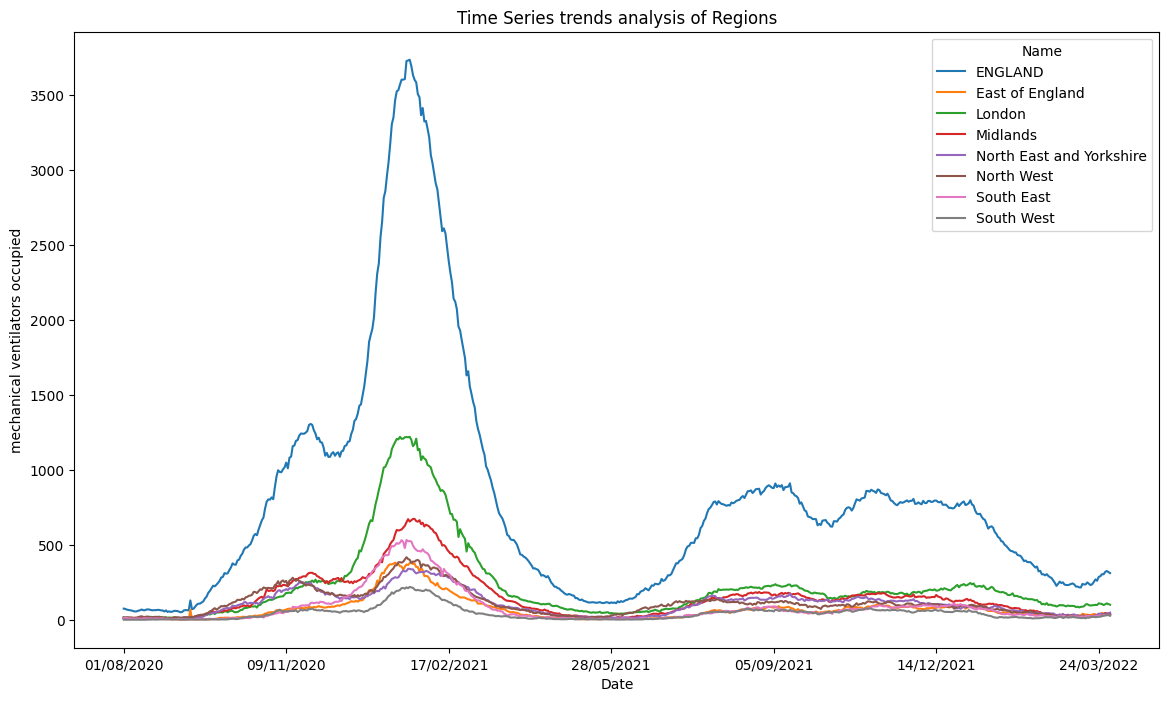

In [38]:
# Plot the data
mv_df.plot(figsize=(14, 8))

# Set the title and labels
plt.title("Time Series trends analysis of Regions")
plt.xlabel("Date")
plt.ylabel("mechanical ventilators occupied")

# Show the plot
plt.show()

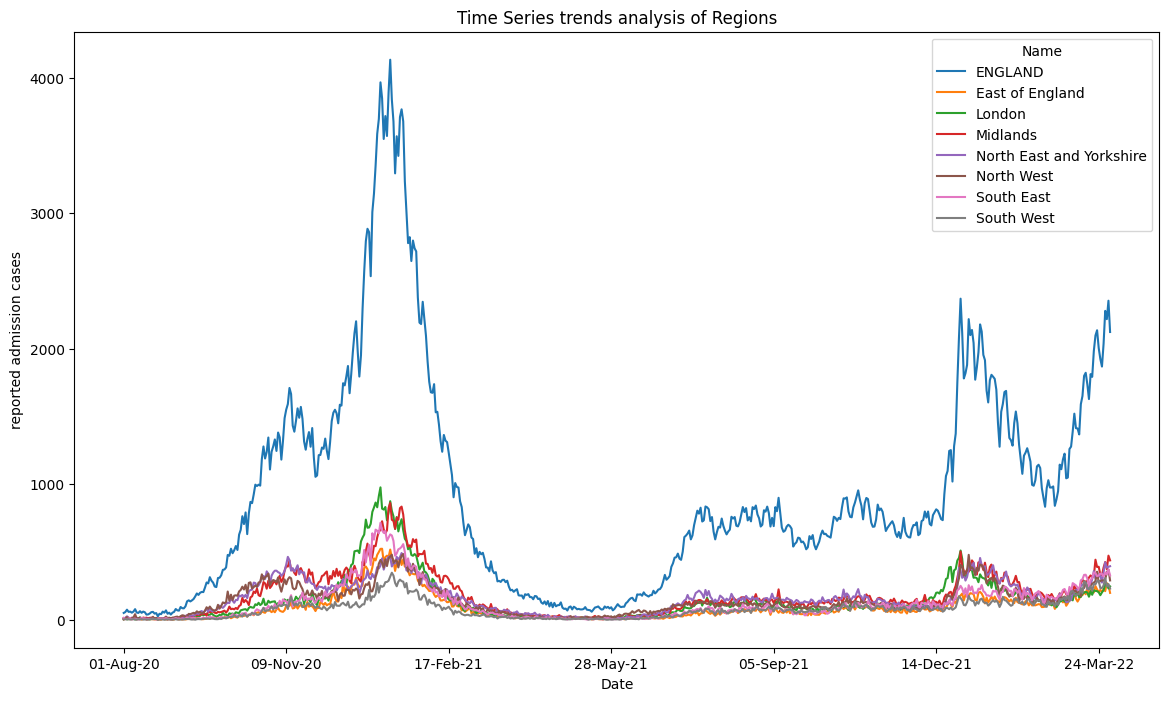

In [39]:
# Plot the data
total_df.plot(figsize=(14, 8))

# Set the title and labels
plt.title("Time Series trends analysis of Regions")
plt.xlabel("Date")
plt.ylabel("reported admission cases")

# Show the plot
plt.show()

In [40]:
mv_df = mv_df.rename(columns={"Name": "Date"})
print(mv_df.columns)

Index(['ENGLAND', 'East of England', 'London', 'Midlands',
       'North East and Yorkshire', 'North West', 'South East', 'South West'],
      dtype='object', name='Name')


In [41]:
mv_df.head()

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0


In [42]:
# Check for missing values
print(mv_df.isnull().sum())

Name
ENGLAND                     0
East of England             0
London                      0
Midlands                    0
North East and Yorkshire    0
North West                  0
South East                  0
South West                  0
dtype: int64


In [43]:
# Check for duplicate rows
print(total_df.duplicated().sum())

0


In [44]:
# Display descriptive statistics
print(mv_df.describe())

Name       ENGLAND  East of England       London    Midlands   
count   608.000000       608.000000   608.000000  608.000000  \
mean    799.748355        71.050987   227.370066  153.036184   
std     794.793406        79.171091   264.169395  147.844453   
min      50.000000         1.000000    10.000000    5.000000   
25%     257.750000        16.000000    82.750000   40.750000   
50%     672.000000        54.000000   165.500000  129.000000   
75%     871.250000        84.000000   222.000000  178.000000   
max    3736.000000       381.000000  1220.000000  673.000000   

Name   North East and Yorkshire  North West  South East  South West  
count                608.000000  608.000000  608.000000  608.000000  
mean                 108.273026  113.547697   83.490132   42.980263  
std                   80.386512   89.701010  115.141986   45.141435  
min                    4.000000   10.000000    2.000000    0.000000  
25%                   38.500000   44.750000   13.000000    9.000000  
50%

In [45]:
mv_df

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0
...,...,...,...,...,...,...,...,...
27/03/2022,303,41,98,35,36,36,31,26
28/03/2022,319,41,103,45,37,33,32,28
29/03/2022,325,37,109,41,42,34,30,32
30/03/2022,318,36,104,40,43,33,32,30
